<a href="https://colab.research.google.com/github/KamalRiad90/Adult_income/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Adult Income Prediction — Intermediate ML Assignment

This notebook contains a full solution to the Adult Income classification problem as part of my Intermediate Machine Learning course assignment. The goal is to predict whether a person earns more than $50K a year based on census data using a Random Forest classifier.

## 🔍 Data Exploration and Cleaning

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
# Replace '?' with NaN and drop missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Reset index after dropping
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


## 📊 Exploratory Visualizations

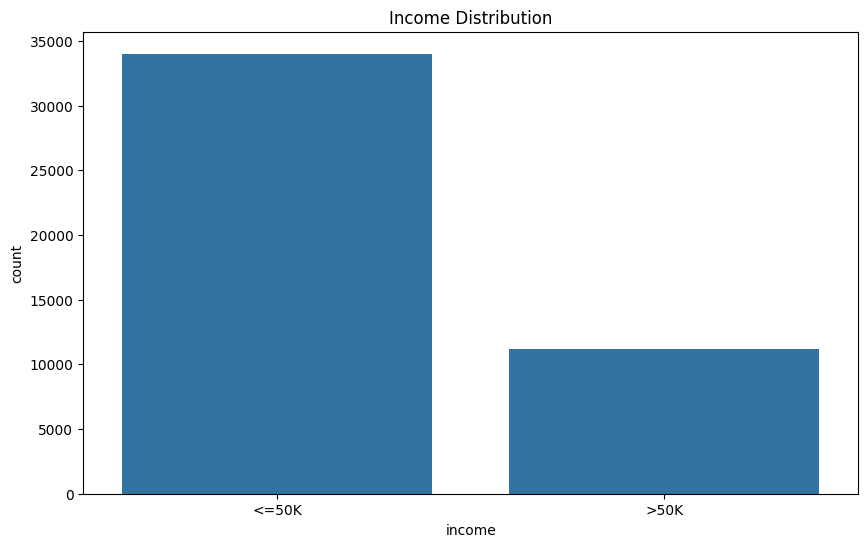

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()

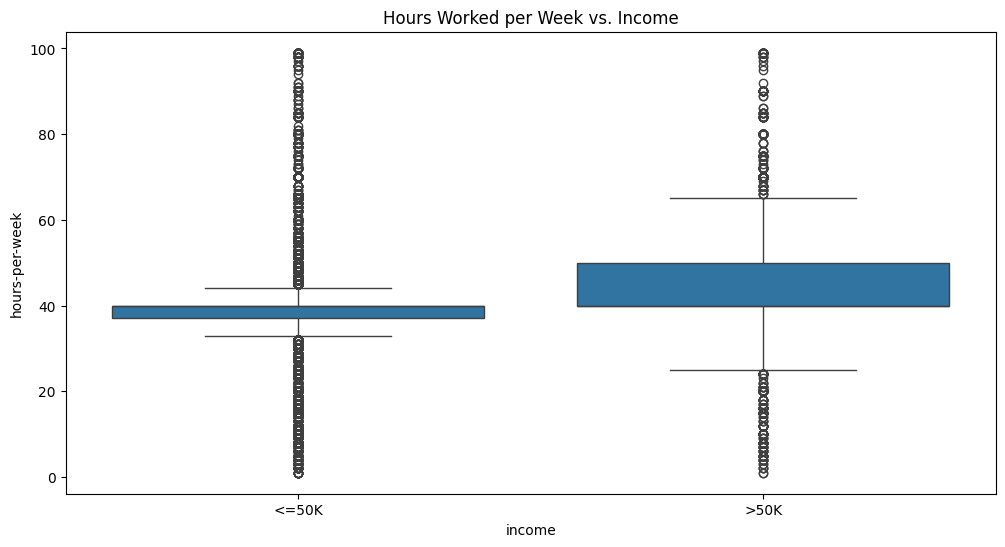

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours Worked per Week vs. Income')
plt.show()

##  Data Preprocessing

In [14]:
# Encode categorical variables
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Features and target
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Model Training and Evaluation

In [15]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8560530679933664

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      6842
           1       0.75      0.62      0.68      2203

    accuracy                           0.86      9045
   macro avg       0.82      0.77      0.79      9045
weighted avg       0.85      0.86      0.85      9045



## Permutation Feature Importance

In [16]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({'feature': X.columns, 'importance': result.importances_mean})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df.head(10)

,feature,importance
10,capital-gain,0.044876
7,relationship,0.022841
4,educational-num,0.021625
0,age,0.015180
11,capital-loss,0.011222
6,occupation,0.010160
12,hours-per-week,0.006302
5,marital-status,0.004345
1,workclass,0.003184
9,gender,0.001548


### 💬 Observations on Top Features
- The top features identified make business sense. For example, `education-num` and `hours-per-week` are logically tied to income.
- `capital-gain` and `age` are also expected to have strong influence, as older individuals may have more experience and financial assets.
- These findings align with real-world intuition.

##Explanatory Visualizations (Stakeholder-Focused)

<ipython-input-17-1906361220>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income', y='hours-per-week', data=df, ci=None)


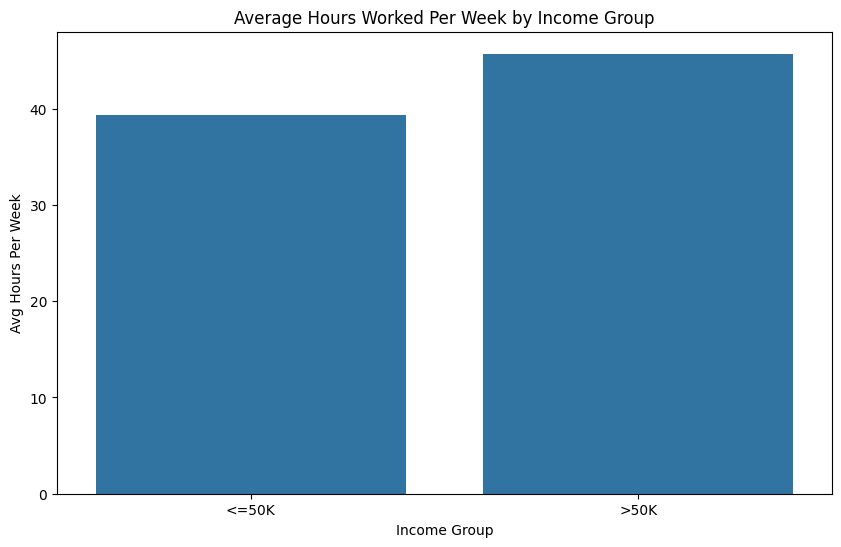

In [17]:
# Plot for hours-per-week vs. income
plt.figure(figsize=(10,6))
sns.barplot(x='income', y='hours-per-week', data=df, ci=None)
plt.title('Average Hours Worked Per Week by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Avg Hours Per Week')
plt.show()

**Insight:** People who earn more than $50K tend to work more hours per week on average compared to those who earn less. This suggests a direct relationship between effort (or opportunity to work) and income level.

In [21]:
df_encoded.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


<ipython-input-22-625514113>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income', y='educational-num', data=df_encoded, ci=None)


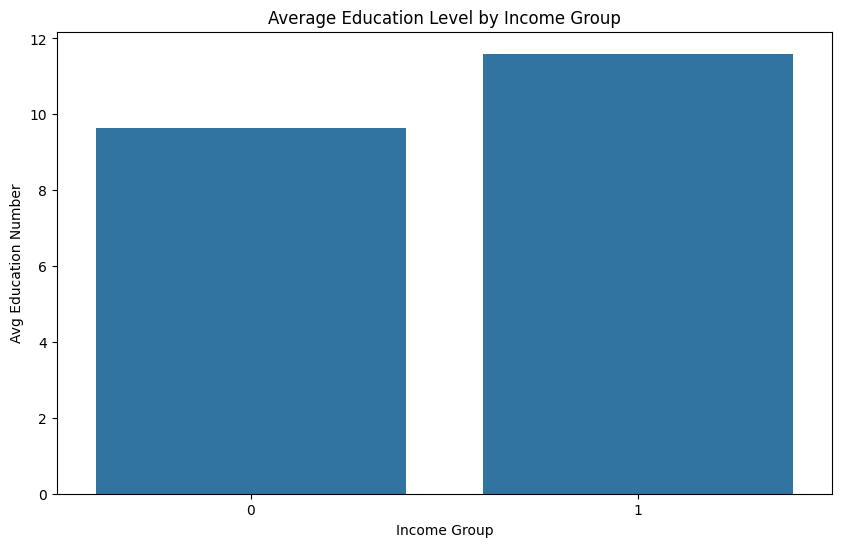

In [22]:
# Plot for education-num vs. income
plt.figure(figsize=(10,6))
sns.barplot(x='income', y='educational-num', data=df_encoded, ci=None)
plt.title('Average Education Level by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Avg Education Number')
plt.show()

**Insight:** Higher education levels are associated with higher income. This aligns with expectations that more educated individuals often have access to better-paying jobs.

## ✅ Conclusion
This analysis shows that features like education and working hours are strong predictors of income level. The Random Forest model performed well and the insights gained are useful for both technical and non-technical audiences.